In [62]:
#Importing the packages
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
import matplotlib.pyplot as plt
%matplotlib inline

# Data Transformation and Rescaling

# Dealing with NaN entries with dataset

# Asthetic Choices 

# Things to think about

In [ ]:
#importing data
data = pd.read_csv("building_inventory.csv")
data

In [64]:
mySelectedLabel = ipywidgets.Label()

In [65]:
#separting Agency names
test1 = data.groupby('Agency Name').size().reset_index()
test1

,Agency Name,0
0,Appellate Court / Fifth District,1
1,Appellate Court / Fourth District,1
2,Appellate Court / Second District,1
3,Appellate Court / Third District,2
4,Chicago State University,16
5,Department of Agriculture,228
6,Department of Central Management Services,60
7,Department of Corrections,1428
8,Department of Human Services,617
9,Department of Juvenile Justice,120


In [66]:
#separating Congress district
test2 = data.groupby('Congress Dist').size().reset_index()
test2

,Congress Dist,0
0,0,163
1,1,48
2,2,318
3,3,36
4,4,11
5,5,46
6,6,26
7,7,110
8,8,107
9,9,10


In [67]:
#converting the cog_dist naames to a list of such names
cong_dist = test2['Congress Dist'].to_list() 

In [68]:
# creating the list of useful values and attributes
agency_name = test1['Agency Name'].to_list()
plot_data = []
for i in range(len(cong_dist)):
    df = data.loc[data['Congress Dist'] == cong_dist[i]]
#     agency = df['Agency Name'].unique()
#     print(len(agency))
    for j in range(len(agency_name)):
        sum1 = (df.loc[df['Agency Name'] == agency_name[j], 'Square Footage'].sum())
        plot_data.append((cong_dist[i], agency_name[j], sum1))   
plot_data
    

[(0, 'Appellate Court / Fifth District', 0),
 (0, 'Appellate Court / Fourth District', 0),
 (0, 'Appellate Court / Second District', 0),
 (0, 'Appellate Court / Third District', 0),
 (0, 'Chicago State University', 0),
 (0, 'Department of Agriculture', 0),
 (0, 'Department of Central Management Services', 231278),
 (0, 'Department of Corrections', 0),
 (0, 'Department of Human Services', 372784),
 (0, 'Department of Juvenile Justice', 0),
 (0, 'Department of Military Affairs', 0),
 (0, 'Department of Natural Resources', 40249),
 (0, 'Department of Public Health', 0),
 (0, 'Department of Revenue', 0),
 (0, 'Department of State Police', 8239),
 (0, 'Department of Transportation', 55578),
 (0, "Department of Veterans' Affairs", 3000),
 (0, 'Eastern Illinois University', 0),
 (0, "Governor's Office", 0),
 (0, 'Governors State University', 0),
 (0, 'Historic Preservation Agency', 3831),
 (0, 'IL State Board of Education', 0),
 (0, 'Illinois Board of Higher Education', 0),
 (0, 'Illinois Com

In [69]:
#creating 
df2 = pd.DataFrame(plot_data, columns =['Congress District', 'Agency Name', 'Square Footage'])
df2.head(350)

,Congress District,Agency Name,Square Footage
0,0,Appellate Court / Fifth District,0
1,0,Appellate Court / Fourth District,0
2,0,Appellate Court / Second District,0
3,0,Appellate Court / Third District,0
4,0,Chicago State University,0
...,...,...,...
345,9,Office of the Attorney General,0
346,9,Office of the Secretary of State,0
347,9,Southern Illinois University,0
348,9,University of Illinois,0


In [70]:
#reshaping the array to make a grid of 19x35
array2d = df2['Square Footage'].to_numpy().reshape(19,35)
array2d

array([[       0,        0,        0,        0,        0,        0,
          231278,        0,   372784,        0,        0,    40249,
               0,        0,     8239,    55578,     3000,        0,
               0,        0,     3831,        0,        0,        0,
               0,     5650,    31200,        0,        0,    41315,
               0,        0,        0,        0,        0],
       [       0,        0,        0,        0,  1219492,        0,
               0,        0,   449547,        0,   564580,        0,
               0,        0,        0,   118143,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0],
       [       0,        0,        0,        0,        0,        0,
               0,    49572,  1253943,        0,   226500,    59050,
               0,        0,        0,   287509,   479061,        0

In [71]:
#finding the unique values for  both the axes
uniq_dist = df2['Congress District'].unique()
uniq_agency = df2['Agency Name'].unique()
len(uniq_dist), len(uniq_agency)

(19, 35)

Creating Heatmap

In [150]:
import bqplot
from bqplot import pyplot
# 2. scales - linear scales
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()
c_sc = bqplot.ColorScale()

# 3. axis
ax_x = bqplot.Axis(scale = x_sc, label='Agency Name')
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='Congress Dist')
ax_col = bqplot.ColorAxis(scale = c_sc, orientation='vertical', side='right') 
# 4. Marks
heat_map = bqplot.GridHeatMap(color = array2d, 
                              row = uniq_dist, 
                              column = uniq_agency, 
                              scales = {'color':c_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'})
#                              selected_style={'opacity':1.0},
#                              unselected_style={'opacity':0.8})

#5. interactivity
mySelectedLabel = ipywidgets.Label()
def on_selected(change): # already modified for our 3d data
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = array2d[i,j] # this is a 2d array!!
        mySelectedLabel.value = 'Square Footage: ' + str(v)

        
# make sure we are observing for changes in our heatmap
heat_map.observe(on_selected, 'selected')
        
# figure!
fig = bqplot.Figure(marks=[heat_map], axes=[ax_col, ax_y, ax_x])
#fig

# dashboard with my label
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard

Creating a line plot

In [34]:
#creating static line plot
line_data = data.groupby('Year Acquired').sum().reset_index()
line_data = line_data[(line_data['Year Acquired']!=0)] # removing the zero values from the 
line_data

,Year Acquired,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
1,1753,62241,12,116,58,1753,1200,1,1,0
2,1802,124482,24,232,116,3604,4440,4,3,1
3,1810,186688,36,348,174,5430,4033,5,5,0
4,1832,62901,12,115,58,1832,120000,2,1,1
5,1837,62471,15,107,54,1837,10302,4,3,1
...,...,...,...,...,...,...,...,...,...,...
167,2015,1241150,313,1972,991,40300,305093,31,6,1
168,2016,612267,117,840,423,20158,304839,16,2,0
169,2017,62526,4,4,2,2017,6720,1,0,0
170,2018,244806,59,265,133,8072,17160,4,0,0


In [35]:
#Creating data for line plot
years= line_data['Year Acquired'].unique()
sq_foot = line_data['Square Footage'].to_numpy()
len(years), len(sq_foot)

(171, 171)

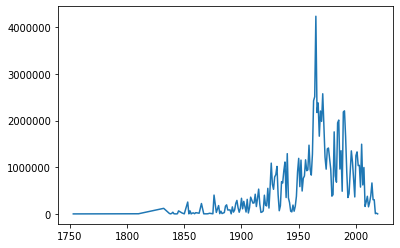

In [36]:
plt.plot(years, sq_foot)

In [14]:
bqplot.pyplot.plot?

In [141]:
figl = bqplot.pyplot.figure(title='Square Foot Acquired Per Year', background_style={'fill': 'lightgreen'},
                 title_style={'font-size': '20px','fill': 'DarkOrange'})
axes_options = {'x': {'label': 'Year Constructed', 'tick_format': '0.0f'},
                'y': {'label': 'Square Footage Constructed', 'tick_format': '0.0f'}}
linep = bqplot.pyplot.plot(x= years, y = sq_foot, axes_options=axes_options)
figl

Figure(axes=[Axis(label='Year Constructed', scale=LinearScale(), tick_format='0.0f'), Axis(label='Square Foota…

In [142]:
linep.y

array([   1200,    4440,    4033,  120000,   10302,    2010,   11752,
         36918,    3256,     900,    4088,   65846,   21292,    2267,
        255000,    2140,   66154,     750,   18124,   22367,    4847,
         27417,   15795,  223494,    2700,    2864,    6403,   14900,
         11000,    6600,    3808,  404280,   33071,  179833,    6671,
         59266,    8725,   30157,  168370,  194823,   84924,   86334,
          2325,  151480,   39590,   85000,  225677,  290165,  132907,
         36760,  121475,  335835,  109486,  269725,  160584,   40964,
        312886,   20374,  133285,  360252,  298283,  231411,  237722,
        422812,  158710,  334106,  532051,  210013,   32976,   42603,
         64878,  402059,  187510,  171594,  549360,  126337,  569198,
       1088997,  637645,  528122,  792329,  841869, 1018630,  414073,
         68963,  176049,  692530,  663400,  926296, 1113321,  351573,
       1292200,  345810,  243070,   57618,   44602,  190079,   58800,
        164730,  378

# Creating final Dashboard

Inserting final interactivity function 

In [143]:
#5. interactivity
mySelectedLabel = ipywidgets.Label()
def on_selected(change): # already modified for our 3d data
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = array2d[i,j] # this is a 2d array!!
        mySelectedLabel.value = 'Square Footage: ' + str(v)
        linep.y = sq_foot[i:j]

Creating the heatmap #1

In [147]:
# 2. scales - linear scales
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()
c_sc = bqplot.ColorScale()

# 3. axis
ax_x = bqplot.Axis(scale = x_sc, label='Agency Name')
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label='Congress Dist')
ax_col = bqplot.ColorAxis(scale = c_sc, orientation='vertical', side='right') 
# 4. Marks
heat_map = bqplot.GridHeatMap(color = array2d, 
                              row = uniq_dist, 
                              column = uniq_agency, 
                              scales = {'color':c_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'},
                             anchor_style={'fill':'blue'},
                             selected_style={'opacity':1.0},
                             unselected_style={'opacity':0.8})
heat_map.observe(on_selected, 'selected')
        
# figure!
fig = bqplot.Figure(marks=[heat_map], axes=[ax_col, ax_y, ax_x])

Adding the line plot #2

In [148]:
#Line Plot
figl = bqplot.pyplot.figure(title='Square Foot constructed per year', background_style={'fill': 'lightgreen'},
                 title_style={'font-size': '20px','fill': 'DarkOrange'})
axes_options = {'x': {'label': 'Year Constructed', 'tick_format': '0.0f'},
                'y': {'label': 'Square Footage Constructed', 'tick_format': '0.0f'}}
linep = bqplot.pyplot.plot(x= years, y = sq_foot, axes_options=axes_options)

Adding Dashboard

In [357]:
# mess with some layout parameters (look a little like CSS stylings)
fig.layout.min_width='500px'
figl.layout.min_width='500px'

figures = ipywidgets.HBox([fig, figl]) # figures side-by-side

# label on top
myDashboard = ipywidgets.VBox([mySelectedLabel, figures])
myDashboard